# ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
pd.set_option('display.max_columns',100)

In [2]:
df_train = pd.read_csv('/Users/tsuneo/kaggle/houseprice/train.csv')
df_test = pd.read_csv('/Users/tsuneo/kaggle/houseprice/test.csv')

In [3]:
print('train:',df_train.shape)
print('test:',df_test.shape)

train: (1460, 81)
test: (1459, 80)


In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
aa = set(df_train['MSZoning'])
print(aa)
print(type(aa))
aa = list(aa)
print(aa)
print(type(aa))

{'RH', 'C (all)', 'RL', 'RM', 'FV'}
<class 'set'>
['RH', 'C (all)', 'RL', 'RM', 'FV']
<class 'list'>


## 欠損値の抽出

In [6]:
train_null = df_train.isnull().sum().sort_values(ascending=False)[:20]
print(train_null[:10])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64


In [7]:
test_null = df_test.isnull().sum().sort_values(ascending=False)[:20]
print(test_null[:10])

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
dtype: int64


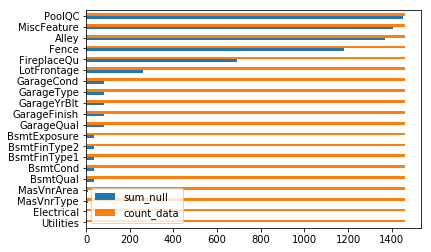

In [8]:
# pandasのDataFrameに変換。変換前はSeries型なので
train_null = pd.DataFrame(train_null)
#type(train_null)

train_null["count_data"] = 1460

# カラム名の更新
train_null.columns = ["sum_null", "count_data"]

# null値のグラフ描画
train_null[::-1].plot.barh()

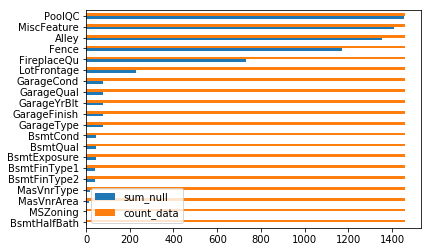

In [9]:
test_null = pd.DataFrame(test_null)
test_null["count_data"] = 1459
test_null.columns = ["sum_null", "count_data"]
test_null[::-1].plot.barh()

In [10]:
# indexを指定した理由は、カラム名だけを抽出したいため
null_col = df_train.isnull().sum()[df_train.isnull().sum()>0].index
null_col_test = df_test.isnull().sum()[df_test.isnull().sum()>0].index

In [11]:
df_train.isnull().sum().sort_values(ascending=False)[df_train.isnull().sum()>0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [12]:
df_test.isnull().sum().sort_values(ascending=False)[df_test.isnull().sum()>0]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

どうやら、訓練データとテストデータでは、欠損値となっている項目が異なるようだ。当たり前っちゃあ当たり前なのだが。

In [13]:
test_null = pd.DataFrame()

In [14]:
df_train.isnull().sum()[df_train.isnull().sum()>0].index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [15]:
null_col

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [16]:
null_col_test

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [17]:
df_train[null_col].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


In [18]:
df_test[null_col_test].head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RH,80.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,0.0,0.0,TA,Typ,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,NaN,MnPrv,NaN,WD
1,RL,81.0,NaN,AllPub,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,0.0,0.0,Gd,Typ,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,NaN,NaN,Gar2,WD
2,RL,74.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,0.0,0.0,TA,Typ,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,NaN,MnPrv,NaN,WD
3,RL,78.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,20.0,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,0.0,0.0,Gd,Typ,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,NaN,NaN,NaN,WD
4,RL,43.0,NaN,AllPub,HdBoard,HdBoard,None,0.0,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,0.0,0.0,Gd,Typ,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,NaN,NaN,NaN,WD


訓練データでは、欠損がある数値データは３カラムだけ。このカラムの最大・最小をみていこう

In [19]:
df_train[null_col].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


テストデータでは、欠損がある数値データのカラムは１１ある。このカラムの最大・最小をみていこう

In [20]:
df_test[null_col_test].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
count,1232.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1457.000000,1457.000000,1381.000000,1458.000000,1458.000000
mean,68.580357,100.709141,439.203704,52.619342,554.294925,1046.117970,0.434454,0.065202,1977.721217,1.766118,472.768861
std,22.376841,177.625900,455.268042,176.753926,437.260486,442.898624,0.530648,0.252468,26.431175,0.775945,217.048611
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000
25%,58.000000,0.000000,0.000000,0.000000,219.250000,784.000000,0.000000,0.000000,1959.000000,1.000000,318.000000
50%,67.000000,0.000000,350.500000,0.000000,460.000000,988.000000,0.000000,0.000000,1979.000000,2.000000,480.000000
75%,80.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1.000000,0.000000,2002.000000,2.000000,576.000000
max,200.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000


# 欠損値処理（数値）
## 数字項目で欠損データが含まれている値を０埋めして見る
オブジェクト型の項目にはまだ、手を付けていない状態です

In [21]:
df_train.LotFrontage = df_train.LotFrontage.fillna(0)
df_train.MasVnrArea = df_train.MasVnrArea.fillna(0)
df_train.GarageYrBlt = df_train.GarageYrBlt.fillna(0)

df_test.LotFrontage = df_test.LotFrontage.fillna(0)
df_test.MasVnrArea = df_test.MasVnrArea.fillna(0)
df_test.BsmtFinSF1 = df_test.BsmtFinSF1.fillna(0)
df_test.BsmtFinSF2 = df_test.BsmtFinSF2.fillna(0)
df_test.BsmtUnfSF = df_test.BsmtUnfSF.fillna(0)
df_test.TotalBsmtSF = df_test.TotalBsmtSF.fillna(0)
df_test.BsmtFullBath = df_test.BsmtFullBath.fillna(0)
df_test.BsmtHalfBath = df_test.BsmtHalfBath.fillna(0)
df_test.GarageYrBlt = df_test.GarageYrBlt.fillna(0)
df_test.GarageCars = df_test.GarageCars.fillna(0)
df_test.GarageArea = df_test.GarageArea.fillna(0)

In [22]:
# 訓練データとテストデータを合算して見た。ただし、以降の処理では利用していない。
#df_train_and_test = pd.concat([df_train, df_test],sort=False)
#df_train_and_test.LotFrontage = df_train_and_test.LotFrontage.fillna(0)
#df_train_and_test.MasVnrArea = df_train_and_test.MasVnrArea.fillna(0)
#df_train_and_test.GarageYrBlt = df_train_and_test.GarageYrBlt.fillna(0)
#df_train_and_test.head()

目的変数であるSalePriceの分布をグラフ化して見る。最初の方でやる手順かも。

/Users/tsuneo/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


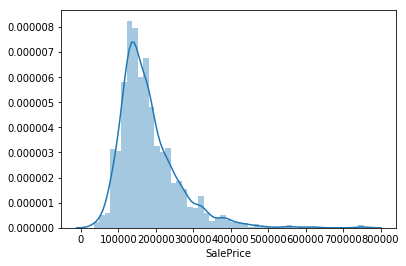

In [23]:
# teacher：教師ラベル
teacher = df_train['SalePrice']

import warnings
warnings.simplefilter('ignore', UserWarning)

import seaborn as sns
sns.distplot(teacher)

#print(y['SalePrice'].index,y)
#plt.show()

In [24]:
a = teacher.values.max()
print(a)

755000


In [25]:
b= np.log(a)

In [26]:
print(b)

13.534473028231162


In [27]:
c = np.exp(b)
print(c)

754999.9999999999


In [28]:
d = np.expm1(b)
print(d)

754998.9999999999


回帰分析では、目的変数を正規分布にした方が良いらしい。７月期生の石川さん曰く、例外なデータに引きづられて回帰直線が崩されることを回避するためらしい。回帰分析以外では、正規分布にしない例もあるとのこと。

/Users/tsuneo/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


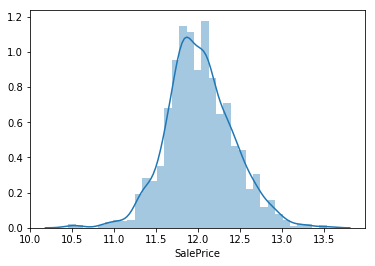

In [29]:
# 正規分布にするために、対数をとる　
normal_distribution = np.log(teacher)

import warnings
warnings.simplefilter('ignore', UserWarning)

import seaborn as sns
sns.distplot(normal_distribution)


モデルが正規分布に従うようになっているので。

# 欠損値処理（オブジェクト型）
オブジェクト型を数字型に変換するfactorizeを利用する。これは欠損も自動でいい感じで処理してくれるらしい  
まずは、オブジェクト型の項目を抽出する

In [30]:
object_columns = df_train.select_dtypes(include=object).columns
print(object_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [31]:
# オブジェクト型の項目を抽出できました。全部で43項目あります。
object_columns.shape

(43,)

In [32]:
type(object_columns)

pandas.core.indexes.base.Index

In [33]:
a, b = pd.factorize(df_train["MSZoning"])

In [34]:
a

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
a.shape

(1460,)

In [36]:
b

Index(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype='object')

In [37]:
# オブジェクト型の項目（カテゴリ変数）の値を、一括してファクトライズして数値に変換掛けます。
# 本当は、１つ１つの項目を確認して、順序特徴量と名義特徴量を区別して、手で辞書型の変数で変換しないといけない。
# しかし、今回はkaggleへサブミットするまで辿り着きたいので、この前処理作業をショートカットしました。
for column in object_columns:
    labels1, uniques1 = pd.factorize(df_train[column])
    labels2, uniques2 = pd.factorize(df_test[column])
    df_train[column] = labels1
    df_test[column] = labels2

# ヒートマップで相関関係を感覚として捉える
説明用として利用可能

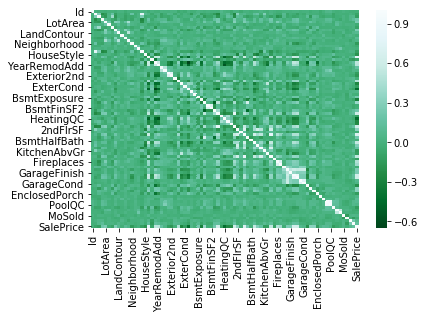

In [38]:
sns.heatmap(df_train.corr(),cmap="BuGn_r")

# 相関関係があるトップ10をグラフ表示

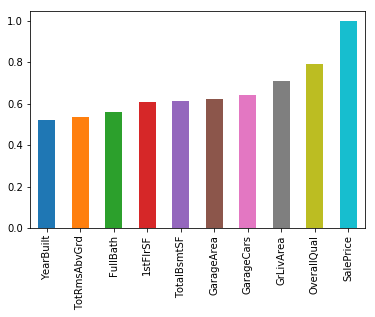

In [39]:
df_train.corr().SalePrice.abs().sort_values()[-10:].plot.bar()

In [40]:
# カテゴリー変数を全て、数値データに変換していることを確認
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,-1,0,0,0,0,0,0,0,0,0,0,7,5,2003,2003,0,0,0,0,0,196.0,0,0,0,0,0,0,0,706,0,0,150,856,0,0,0,0,856,854,0,1710,1,0,2,1,3,1,0,8,0,0,-1,0,2003.0,0,2,548,0,0,0,0,61,0,0,0,0,-1,-1,-1,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,-1,0,0,0,1,0,1,1,0,0,1,6,8,1976,1976,0,0,1,1,1,0.0,1,0,1,0,0,1,1,978,0,0,284,1262,0,0,0,0,1262,0,0,1262,0,1,2,0,3,1,1,6,0,1,0,0,1976.0,0,2,460,0,0,0,298,0,0,0,0,0,-1,-1,-1,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,-1,1,0,0,0,0,0,0,0,0,0,7,5,2001,2002,0,0,0,0,0,162.0,0,0,0,0,0,2,0,486,0,0,434,920,0,0,0,0,920,866,0,1786,1,0,2,1,3,1,0,6,0,1,0,0,2001.0,0,2,608,0,0,0,0,42,0,0,0,0,-1,-1,-1,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,-1,1,0,0,2,0,2,0,0,0,0,7,5,1915,1970,0,0,2,2,1,0.0,1,0,2,1,1,0,1,216,0,0,540,756,0,1,0,0,961,756,0,1717,1,0,1,0,3,1,0,7,0,1,1,1,1998.0,1,3,642,0,0,0,0,35,272,0,0,0,-1,-1,-1,0,2,2006,0,1,140000
4,5,60,0,84.0,14260,0,-1,1,0,0,1,0,3,0,0,0,0,8,5,2000,2000,0,0,0,0,0,350.0,0,0,0,0,0,3,0,655,0,0,490,1145,0,0,0,0,1145,1053,0,2198,1,0,2,1,4,1,0,9,0,1,0,0,2000.0,0,3,836,0,0,0,192,84,0,0,0,0,-1,-1,-1,0,12,2008,0,0,250000


In [41]:
# カテゴリー変数を全て、数値データに変換していることを確認
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,0,80.0,11622,0,-1,0,0,0,0,0,0,0,0,0,0,5,6,1961,1961,0,0,0,0,0,0.0,0,0,0,0,0,0,0,468.0,0,144.0,270.0,882.0,0,0,0,0,896,0,0,896,0.0,0.0,1,0,2,1,0,5,0,0,-1,0,1961.0,0,1.0,730.0,0,0,0,140,0,0,0,120,0,-1,0,-1,0,6,2010,0,0
1,1462,20,1,81.0,14267,0,-1,1,0,0,1,0,0,1,0,0,0,6,6,1958,1958,1,0,1,1,1,108.0,0,0,0,0,0,0,1,923.0,1,0.0,406.0,1329.0,0,0,0,0,1329,0,0,1329,0.0,0.0,1,1,3,1,1,6,0,0,-1,0,1958.0,0,1.0,312.0,0,0,0,393,36,0,0,0,0,-1,-1,0,12500,6,2010,0,0
2,1463,60,1,74.0,13830,0,-1,1,0,0,0,0,1,1,0,0,1,5,5,1997,1998,0,0,0,0,0,0.0,0,0,1,1,0,0,2,791.0,1,0.0,137.0,928.0,0,1,0,0,928,701,0,1629,0.0,0.0,2,1,3,1,0,6,0,1,0,0,1997.0,1,2.0,482.0,0,0,0,212,34,0,0,0,0,-1,0,-1,0,3,2010,0,0
3,1464,60,1,78.0,9978,0,-1,1,0,0,0,0,1,1,0,0,1,6,6,1998,1998,0,0,0,0,1,20.0,0,0,1,0,0,0,2,602.0,1,0.0,324.0,926.0,0,2,0,0,926,678,0,1604,0.0,0.0,2,1,3,1,1,7,0,1,1,0,1998.0,1,2.0,470.0,0,0,0,360,36,0,0,0,0,-1,-1,-1,0,6,2010,0,0
4,1465,120,1,43.0,5005,0,-1,1,1,0,0,0,2,1,0,1,0,8,5,1992,1992,0,0,2,2,0,0.0,1,0,1,1,0,0,1,263.0,1,0.0,1017.0,1280.0,0,2,0,0,1280,0,0,1280,0.0,0.0,2,0,2,1,1,5,0,0,-1,0,1992.0,2,2.0,506.0,0,0,0,0,82,0,0,144,0,-1,-1,-1,0,1,2010,0,0


In [42]:
# 全ての項目がnon-nullとなっていることを.infoで確認
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
Condition2       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null int64
Ext

In [43]:
# 全ての項目がnon-nullとなっていることを.infoで確認
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null int64
Alley            1459 non-null int64
LotShape         1459 non-null int64
LandContour      1459 non-null int64
Utilities        1459 non-null int64
LotConfig        1459 non-null int64
LandSlope        1459 non-null int64
Neighborhood     1459 non-null int64
Condition1       1459 non-null int64
Condition2       1459 non-null int64
BldgType         1459 non-null int64
HouseStyle       1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null int64
RoofMatl         1459 non-null int64
Exterior1st      1459 non-null int64
Ext

# sklearn（サイキットラーン）で学習・予測する
簡易的ではあるが、前処理が終わった。
今回は線形回帰（LinearRegression）で進める。LightGBMはネット上に情報が少ないので手を付けない。  
<学習モデル>  
・LinearRegression  
・LightGBM  
・Random Forest  

In [44]:
# データ数に変更ないことを確認
df_train.shape

(1460, 81)

In [45]:
# データ数に変更ないことを確認
df_test.shape

(1459, 80)

In [46]:
# 学習する前に、訓練データの中に目的変数（SalePrice）が入っているので、これは学習対象から除外しないといけないので、
# 除外する！！！！
df_train = df_train.drop("SalePrice", axis = 1)

# 学習実施！

In [47]:
# train_x:トレーニング用の特徴行列
# test_x:テスト用の特徴行列
# train_y:トレーニング用の目的変数
# test_y:テスト用の目的変数
train_x, test_x, train_y, test_y = train_test_split(df_train, normal_distribution,test_size=0.3, random_state=0)

model = LinearRegression()

# sklearn.linear_model.LinearRegression クラスのメソッドであるfit
# fit(X, y[, sample_weight]) 線形回帰モデルのあてはめを実行。偏回帰係数を最適な値を導き出してくれる。
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

次に、上記で訓練データを、訓練データとテストデータに分割している。そのテストデータを元にして、モデルの性能を評価して見る。クロスバリデーション（交差検証）は今回は時間もないし、行わない。

# モデルの性能評価

In [48]:
from sklearn import metrics

In [49]:
print(np.sqrt(metrics.mean_squared_error(test_y, model.predict(test_x))))

0.18527147999763302


In [50]:
print("偏回帰変数：",model.coef_)  #回帰変数の表示
print('-'*100)
print("回帰直線の切片：",model.intercept_)  #回帰直線の切片
print('-'*100)
print("パラメータの取得：",model.get_params())  #パラメータの取得
print('-'*100)
print("予測値の表示：",model.predict(test_x))  #予測値の表示
print('-'*100)
print("決定係数の表示：",model.score(test_x,test_y))  #決定係数の表示

偏回帰変数： [-7.50650830e-06 -4.39235075e-05 -9.97999035e-03  1.35613897e-04
  1.86272504e-06 -2.05441366e-01  1.93471231e-02  1.36327670e-02
  1.28259293e-02 -1.82757107e-01  8.03615660e-03  6.76931850e-03
 -1.90172588e-03 -1.25006650e-02 -8.16598460e-02 -1.47886034e-02
  2.64089955e-03  6.85351206e-02  4.24499575e-02  2.10539825e-03
  7.53998759e-04  1.77892298e-02 -1.14494115e-02 -2.26467030e-03
  1.18247026e-03  5.80869522e-03 -1.20207531e-06 -1.38150351e-02
 -1.71844343e-02 -5.96235779e-03  1.24683164e-02 -9.38713928e-03
 -1.16217191e-03 -4.65557505e-03  4.64007228e-05 -2.80504821e-03
  4.13270733e-05 -1.16192783e-05  7.61085178e-05  2.49744443e-03
 -2.26103210e-02 -6.54842012e-02  2.36599615e-03  8.90249010e-05
  2.49049370e-05  5.03332444e-05  1.64263082e-04  3.21284518e-02
  1.61468676e-02  5.00519143e-02  3.75206175e-02 -4.13187223e-03
 -5.14374141e-02  2.23128089e-02  1.18088544e-02 -2.87624534e-02
  3.59834195e-02  8.46462247e-04 -4.65315831e-03  2.24586779e-05
  4.70871934e-04  

In [51]:
# もう必要ない
# df_test = df_test.fillna(-1)

In [52]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,0,80.0,11622,0,-1,0,0,0,0,0,0,0,0,0,0,5,6,1961,1961,0,0,0,0,0,0.0,0,0,0,0,0,0,0,468.0,0,144.0,270.0,882.0,0,0,0,0,896,0,0,896,0.0,0.0,1,0,2,1,0,5,0,0,-1,0,1961.0,0,1.0,730.0,0,0,0,140,0,0,0,120,0,-1,0,-1,0,6,2010,0,0
1,1462,20,1,81.0,14267,0,-1,1,0,0,1,0,0,1,0,0,0,6,6,1958,1958,1,0,1,1,1,108.0,0,0,0,0,0,0,1,923.0,1,0.0,406.0,1329.0,0,0,0,0,1329,0,0,1329,0.0,0.0,1,1,3,1,1,6,0,0,-1,0,1958.0,0,1.0,312.0,0,0,0,393,36,0,0,0,0,-1,-1,0,12500,6,2010,0,0
2,1463,60,1,74.0,13830,0,-1,1,0,0,0,0,1,1,0,0,1,5,5,1997,1998,0,0,0,0,0,0.0,0,0,1,1,0,0,2,791.0,1,0.0,137.0,928.0,0,1,0,0,928,701,0,1629,0.0,0.0,2,1,3,1,0,6,0,1,0,0,1997.0,1,2.0,482.0,0,0,0,212,34,0,0,0,0,-1,0,-1,0,3,2010,0,0
3,1464,60,1,78.0,9978,0,-1,1,0,0,0,0,1,1,0,0,1,6,6,1998,1998,0,0,0,0,1,20.0,0,0,1,0,0,0,2,602.0,1,0.0,324.0,926.0,0,2,0,0,926,678,0,1604,0.0,0.0,2,1,3,1,1,7,0,1,1,0,1998.0,1,2.0,470.0,0,0,0,360,36,0,0,0,0,-1,-1,-1,0,6,2010,0,0
4,1465,120,1,43.0,5005,0,-1,1,1,0,0,0,2,1,0,1,0,8,5,1992,1992,0,0,2,2,0,0.0,1,0,1,1,0,0,1,263.0,1,0.0,1017.0,1280.0,0,2,0,0,1280,0,0,1280,0.0,0.0,2,0,2,1,1,5,0,0,-1,0,1992.0,2,2.0,506.0,0,0,0,0,82,0,0,144,0,-1,-1,-1,0,1,2010,0,0


# テストデータで予測して見る

In [65]:
pred = model.predict(df_test)
print(pred.shape)
print(type(pred))

# exp関数を利用して、戻してあげる
pred = np.exp(pred)
print(pred.shape)
print(type(pred))

(1459,)
<class 'numpy.ndarray'>
(1459,)
<class 'numpy.ndarray'>


In [60]:
pred2 = pd.DataFrame(df_test.Id)
pred2["SalePrice"] = pred

# submissionファイルを作成する

In [63]:
pred2.to_csv("submissions.csv",index=False)

In [64]:
pred2

,Id,SalePrice
0,1461,128717.059985
1,1462,204424.735595
2,1463,173257.896461
3,1464,196002.888175
4,1465,180592.178139
5,1466,173487.075961
6,1467,170318.182251
7,1468,164586.770769
8,1469,189332.384109
9,1470,116764.330919
